# Data Import & Preparation

In [2]:
# Import Dependencies
import pandas as pd
import json
import glob

In [3]:
# Convert JSONs to DataFrames
df_fall_21 = pd.read_json('fall2021.json')
df_spring_21 = pd.read_json('spring2021.json')
df_fall_22 = pd.read_json('fall2022.json')
df_spring_22 = pd.read_json('spring2022.json')
df_fall_23 = pd.read_json('fall2023.json')
df_spring_23 = pd.read_json('spring2023.json')

In [4]:
# Combine DataFrames
combined_df = pd.concat([df_fall_21, df_spring_21, df_spring_22, df_fall_22, df_spring_23, df_fall_23], ignore_index=True)

In [5]:
combined_df

,status,applicationDate,decisionDate,education,recommendations,experience,statementOfPurpose,comments,toeflScore,gre,moocs,relevantCreditCourses
0,Accepted,01/19/2021,04/23/2021,"{'institution': 'Big State School', 'degrees':...",0,"Unrelated(Active Duty Air Force), open source ...",Y,"All A's for prereq's, including the ones on th...",NaN,NaN,NaN,NaN
1,Accepted,12/28/2020,04/08/2021,"{'institution': 'University of Minnesota', 'de...",1,"3 years as machine learning engineer, 3 years ...",Y,I also have publications and thesis. Generally...,NaN,NaN,NaN,NaN
2,Rejected,01/12/2021,05/10/2022,"{'institution': 'University of Illinois', 'deg...",1,"3 years, manufacturing, Python & SQL",Y,"Got rejected, but I've already accepted an adm...",NaN,NaN,NaN,NaN
3,Accepted,02/02/2021,04/08/2021,"{'degree': 'BS Health Sciences', 'institution'...",3,5 years in research in academia which involved...,Y,Nervous and will need to do a lot of studying ...,NaN,NaN,NaN,NaN
4,Accepted,03/18/2021,04/23/2021,"{'institution': 'UT Austin', 'degree': 'BS Dat...",3,No relevant experience.,Y,My Weakness - I know my 3.92 GPA seems like a ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,04/15/2023,05/26/2023,"{'institution': 'UT Austin', 'degrees': [{'deg...",0,Relevant research experience,Pursuing a MS in DS is beneficial for my resea...,NaN,NaN,NaN,NaN,Prior education covered prerequisite courses a...
68,Accepted,02/27/2023,05/23/2023,"{'institution': 'Top 10 Canadian School', 'deg...",1,"8 months permanent full-time, analytical (Some...",Discussed my aspirations to break into a more ...,NaN,NaN,NaN,NaN,"Pre-reqs satisfied by college, one additional ..."
69,Accepted,04/02/2023,05/31/2023,{'institution': 'Liberal Arts College in Iowa'...,3,"4 years in auditing, building data analytics t...",Talked about how data has propelled my career ...,NaN,NaN,NaN,NaN,"[Advanced mathematics (linear algebra, multiva..."
70,Accepted,12/15/2022,03/08/2023,"{'institution': 'Texas Tech University', 'degr...",1,7 months permanent full-time in a mechanical e...,Related my previous roles and background as an...,NaN,NaN,NaN,NaN,"[Multivariable Calculus, Linear Algebra, Stati..."


# Preliminary Data Exploration & Visualization

## Summary Statistics

In [6]:
# Import even more Dependencies
import matplotlib.pyplot as plt
import seaborn as sns

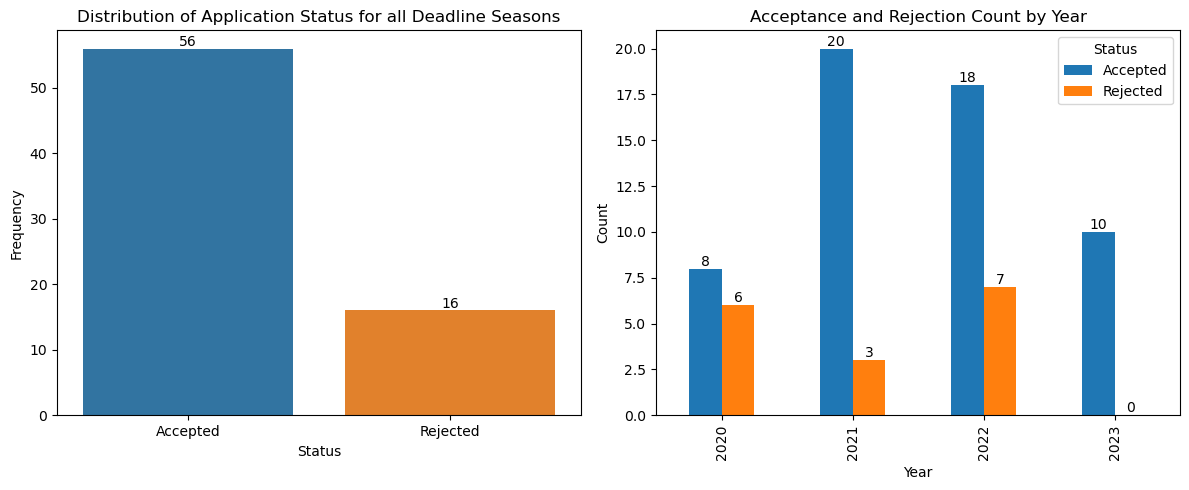

In [7]:
# Convert 'decisionDate' column to datetime format
combined_df['decisionDate'] = pd.to_datetime(combined_df['decisionDate'], format='%m/%d/%Y', errors='coerce')

# Extract the year from 'decisionDate'
combined_df['year'] = combined_df['decisionDate'].dt.year

# Group the data by 'year' and 'status' columns
grouped_data = combined_df.groupby(['year', 'status']).size().unstack()

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the overall histogram in the first subplot
sns.countplot(data=combined_df, x='status', ax=axes[0])
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Application Status for all Deadline Seasons')

# Add quantity labels above each bar in the first subplot
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot the grouped histogram in the second subplot
grouped_data.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].set_title('Acceptance and Rejection Count by Year')
axes[1].legend(title='Status')

# Add quantity labels above each bar in the second subplot
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Extract the GPA values from the 'education' field
gpas = combined_df['education'].apply(lambda x: x['gpa'] if ('gpa' in x and isinstance(x['gpa'], (float, int))) else None)

# Remove any missing values (None)
gpas = gpas.dropna()

# Calculate the mean GPA
mean_gpa = round(gpas.mean(), 3)

# Print the mean GPA
print("Mean GPA:", mean_gpa)

Mean GPA: 3.476


In [9]:
gre_reported_count = combined_df['gre'].count()
total_applicants = len(combined_df)
gre_takers_str = f"GRE Takers: {gre_reported_count}/{total_applicants} applicants"
print(gre_takers_str)

GRE Takers: 14/72 applicants


In [10]:
import numpy as np

# Calculate the mean scores for each section of the GRE
mean_quantitative = round(combined_df['gre'].apply(lambda x: x.get('quantitative') if isinstance(x, dict) else np.nan).mean() , 1 )
mean_verbal = round(combined_df['gre'].apply(lambda x: x.get('verbal') if isinstance(x, dict) else np.nan).mean() , 1 )
mean_writing = round(combined_df['gre'].apply(lambda x: x.get('writing') if isinstance(x, dict) else np.nan).mean() , 2)

gre_mean_scores_str = f"GRE Mean Scores by Section:\nQ: {mean_quantitative}\nV: {mean_verbal}\nW: {mean_writing}"
print(gre_mean_scores_str)


GRE Mean Scores by Section:
Q: 164.9
V: 163.6
W: 4.42


In [11]:
import math

# FYI, the math library is imported and the function ceil is used to round up to nearest whole integer if mean of rec letters comes out as a float
mean_recommendation_letters = math.ceil(combined_df['recommendations'].mean())
mean_recommendation_letters_str = f"Average Amount of Recommendation Letters: {mean_recommendation_letters}"

print(mean_recommendation_letters_str)

Average Amount of Recommendation Letters: 2


In [12]:
import re
# This will go through all of the comments in the "experience" column, see if there is a number in front of the word year(s) and month(s), and then find the mean of relevant experience in years
# Extract the numerical values from the "experience" column
experience_values = combined_df['experience'].str.extract(r'(\d+)(?= year| years| month| months)')

# Convert the extracted values to numeric
experience_values = pd.to_numeric(experience_values[0], errors='coerce')

# Convert months to years by dividing by 12
experience_values.loc[combined_df['experience'].str.contains('month|months', na=False)] /= 12

# Drop the NaN values
experience_values = experience_values.dropna()

# Calculate the average, in years, of the extracted values
mean_experience = experience_values.mean()
median_experience = experience_values.median()

# Convert mean experience to years and months
mean_years = math.floor(mean_experience)
mean_months = round((mean_experience - mean_years) * 12)

# Convert median experience to years and months
median_years = math.floor(median_experience)
median_months = round((median_experience - median_years) * 12)

# Print the mean and median experience in years and months
mean_experience_str = f"Mean Experience: {mean_years} years {mean_months} months"
median_experience_str = f"Median Experience: {median_years} years {median_months} months"

print(mean_experience_str)
print(median_experience_str)

Mean Experience: 4 years 2 months
Median Experience: 3 years 0 months


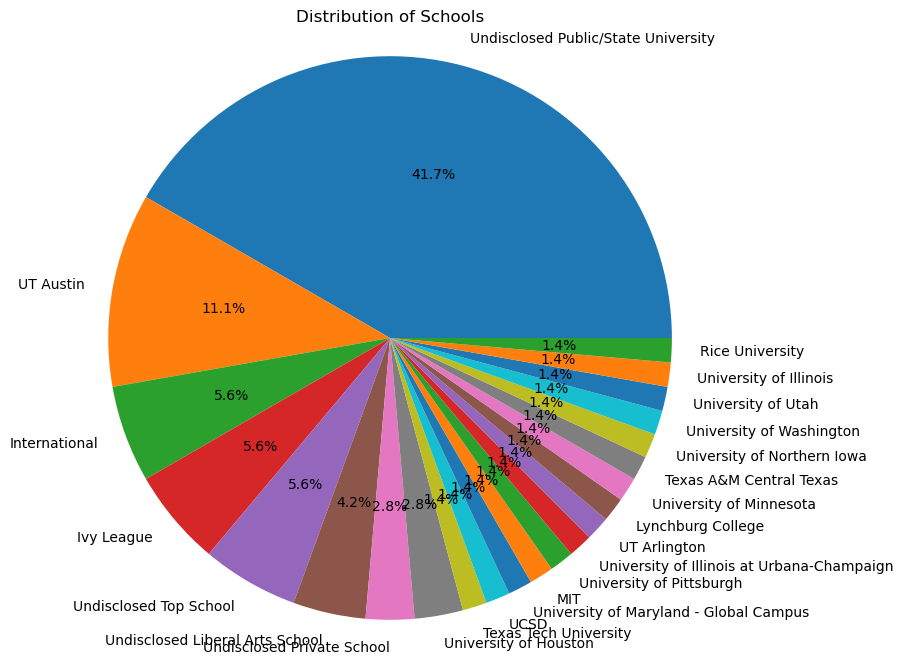

In [13]:
import re

school_names = combined_df['education'].apply(lambda x: x['institution'] if isinstance(x, dict) and 'institution' in x else [item['institution'] for item in x if 'institution' in item])

# Modify the school names to group specific schools
school_names_modified = school_names.copy()

# Group "Columbia University" and "Yale University" under "Ivy League"
school_names_modified = [name if name not in ["Columbia University", "Yale University"] else "Ivy League" for name in school_names_modified]
# Group schools with "state" or "public" in the name under "Undisclosed Public/State University"
school_names_modified = [name if isinstance(name, str) and ("public" not in name.lower() and "state" not in name.lower()) else "Undisclosed Public/State University" for name in school_names_modified]
# Group schools with "Top" or "Great" in the name under "Undisclosed Top School"
school_names_modified = [name if isinstance(name, str) and ("top" not in name.lower() and "great" not in name.lower()) else "Undisclosed Top School" for name in school_names_modified]
# Group schools with "liberal arts" in the name under "Undisclosed Liberal Arts School"
school_names_modified = [name if isinstance(name, str) and "liberal arts" not in name.lower() else "Undisclosed Liberal Arts School" for name in school_names_modified]
# Group schools with "private" in the name under "Undisclosed Private School"
school_names_modified = [name if isinstance(name, str) and "private" not in name.lower() else "Undisclosed Private School" for name in school_names_modified]
# Group schools with "Tec de Monterrey", "Canadian", "Waterloo", "overseas" in the name under "International"
school_names_modified = [name if isinstance(name, str) and not any(keyword in name.lower() for keyword in ["tec de monterrey", "canadian", "waterloo", "overseas"]) else "International" for name in school_names_modified]

# Filter out responses to get a single institution entry
school_names_cleaned = [name for name in school_names_modified if not isinstance(name, list)]

# Count the occurrences of each school
school_counts = pd.Series(school_names_cleaned).value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(school_counts.values, labels=school_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Schools')
plt.axis('equal')
plt.show() 

# Model & Feature Development/Preparation

## Techniques for String-Based Features

In [14]:
# DATA PREPARATION - New JSON
new_df_combined = pd.read_json('ALLsemesters.json')
new_df_combined.drop('toeflScore', axis=1, inplace=True)

# Extract institution, degree, and GPA from 'education' field
new_df_combined['institution'] = new_df_combined['education'].apply(lambda x: x['institution'] if isinstance(x, dict) and 'institution' in x else None)
new_df_combined['degree'] = new_df_combined['education'].apply(lambda x: x['degree'] if isinstance(x, dict) and 'degree' in x else None)
new_df_combined['gpa'] = new_df_combined['education'].apply(lambda x: x['gpa'] if isinstance(x, dict) and 'gpa' in x else None)

new_df_combined['gre_quantitative'] = new_df_combined['gre'].apply(lambda x: x['quantitative'] if isinstance(x, dict) and 'quantitative' in x else None)
new_df_combined['gre_verbal'] = new_df_combined['gre'].apply(lambda x: x['verbal'] if isinstance(x, dict) and 'verbal' in x else None)
new_df_combined['gre_writing'] = new_df_combined['gre'].apply(lambda x: x['writing'] if isinstance(x, dict) and 'writing' in x else None)


# Drop the several columns
new_df_combined = new_df_combined.drop('education', axis=1)
new_df_combined = new_df_combined.drop('applicationDate', axis=1)
new_df_combined = new_df_combined.drop('decisionDate', axis=1)
new_df_combined = new_df_combined.drop('gre', axis=1)

new_df_combined

,status,recommendations,experience,statementOfPurpose,comments,moocs,relevantCreditCourses,institution,degree,gpa,gre_quantitative,gre_verbal,gre_writing
0,Accepted,0,"Unrelated(Active Duty Air Force), open source ...",Y,"All A's for prereq's, including the ones on th...",NaN,NaN,Big State School,MS in Software Engineering,4.00,NaN,NaN,NaN
1,Accepted,1,"3 years as machine learning engineer, 3 years ...",Y,I also have publications and thesis. Generally...,NaN,NaN,University of Minnesota,MS in Computer Science,3.70,NaN,NaN,NaN
2,Rejected,1,"3 years, manufacturing, Python & SQL",Y,"Got rejected, but I've already accepted an adm...",NaN,NaN,University of Illinois,BS in Mechanical Engineering,3.75,NaN,NaN,NaN
3,Accepted,3,5 years in research in academia which involved...,Y,Nervous and will need to do a lot of studying ...,NaN,NaN,None,BS in Health Sciences,NaN,NaN,NaN,NaN
4,Accepted,3,NaN,Y,My Weakness - I know my 3.92 GPA seems like a ...,NaN,NaN,UT Austin,BS in Data Science,3.92,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,2,Manufacturing Operations and Quality 8 yrs,Talked about experience working on Stats and r...,NaN,Coursera ML Mathematics and Python,NaN,None,BS in Mechanical Engineering,3.50,NaN,NaN,NaN
68,Accepted,3,"Community college professor (tenured, 8 years)...",Explained the big project I wanted to work on ...,NaN,none,NaN,UCSD,MS in Materials Science,3.80,NaN,NaN,NaN
69,Accepted,0,"Not much, but I just accepted a position as an...",Explained how I am passionate about building a...,NaN,1 - Deep Learning with PyTorch from IBM,NaN,UT Austin,MA in Economics,3.60,160.0,168.0,4.5
70,Accepted,2,"15 Years, Cloud, DevOps, Python, ML",Explained how my previous experience is relate...,NaN,Andrew NG's ML Specialization,NaN,None,BS in Mechanical Engineering,3.40,NaN,NaN,NaN


In [15]:
encoded_df = pd.get_dummies(new_df_combined, columns=['experience','statementOfPurpose','comments','moocs','relevantCreditCourses','institution','degree'])
encoded_df

,status,recommendations,gpa,gre_quantitative,gre_verbal,gre_writing,experience_1 month internship in SparkCognition as an Engineering Intern (involves NLP (Natural Language Processing)); will include CV in application once MyStatus opens up for me,"experience_1 year (DE, non-DS)",experience_1 year Data Scientist and 4 years Data/Business Analyst in FAANG and tech.,"experience_1-1/2 Years, Hardware Engineer",...,degree_MS in Accounting,degree_MS in Computer Science,degree_MS in Materials Science,degree_MS in Nuclear Engineering,degree_MS in Software Engineering,degree_Master of Library and Information Science,degree_Master of Science in Bioinformatics,degree_Ph.D in Applied Mathematics,degree_PhD Environmental Science,degree_PhD in QM
0,Accepted,0,4.00,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Accepted,1,3.70,NaN,NaN,NaN,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Rejected,1,3.75,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Accepted,3,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Accepted,3,3.92,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,2,3.50,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,Accepted,3,3.80,NaN,NaN,NaN,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
69,Accepted,0,3.60,160.0,168.0,4.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,Accepted,2,3.40,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using SMOTE for Imbalanced Classification

In [16]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = encoded_df.drop('status', axis=1)
y = encoded_df['status']

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to fill in missing values
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed_df, y)

In [17]:
# Checking if the SMOTE technique worked

# Before SMOTE
print("Before SMOTE:")
print(y.value_counts())

# After SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
Accepted    56
Rejected    16
Name: status, dtype: int64

After SMOTE:
Accepted    56
Rejected    56
Name: status, dtype: int64


## Splitting Data: Training and Test Sets

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Accepted')
recall = recall_score(y_test, y_pred, pos_label='Accepted')
f1 = f1_score(y_test, y_pred, pos_label='Accepted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9130434782608695
Precision: 0.875
Recall: 1.0
F1-score: 0.9333333333333333


In [22]:
'''
# Train the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Get feature importances
importances = classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the features in the original order
feature_names = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
'''

"\n# Train the Random Forest classifier\nclassifier = RandomForestClassifier(random_state=42)\nclassifier.fit(X_train, y_train)\n\n# Get feature importances\nimportances = classifier.feature_importances_\n\n# Sort feature importances in descending order\nsorted_indices = np.argsort(importances)[::-1]\nsorted_importances = importances[sorted_indices]\n\n# Get the names of the features in the original order\nfeature_names = X.columns[sorted_indices]\n\n# Plot the feature importances\nplt.figure(figsize=(10, 6))\nplt.bar(range(len(importances)), sorted_importances, tick_label=feature_names)\nplt.xticks(rotation=90)\nplt.xlabel('Feature')\nplt.ylabel('Importance')\nplt.title('Feature Importances')\nplt.tight_layout()\nplt.show()\n"

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained your random forest classifier
# and stored it in a variable called 'rf_classifier'

# Define a new instance or instances to classify
new_instances = [[5.1, 3.5, 1.4, 0.2], [6.3, 2.9, 5.6, 1.8], [4.9, 2.5, 4.5, 1.7]]

# Preprocess the new instances if required (e.g., scaling, encoding)

# Use the classifier to predict the labels for the new instances
print(predicted_labels = rf_classifier.predict(new_instances))

C:\Users\jbooker\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but RandomForestClassifier is expecting 284 features as input.